<b>Bootstrap Analysis for Claim 1: </b> Claim 1 : The clustered heatmap produced by SaVanT separates the acute infection samples into two groups: the predominantly influenza cluster was characterized by higher signature values for type I interferon pathways, <b> B cells </b>, cell-cycle, DNA damage, and apoptosis (Fig. 3B).
<div><b>Hypothesis I'm testing based on this claim:</b> Influenza pneumonia patients have an enrichment of B cell signature scores compared to Bacterial pneumonia patients.</div>

# Grab Data:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pickle

In [3]:
import sys
print ( sys.path )

['/Users/danielfrees/Desktop/Savant_Notebook', '/opt/anaconda3/envs/py3.9/lib/python39.zip', '/opt/anaconda3/envs/py3.9/lib/python3.9', '/opt/anaconda3/envs/py3.9/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/py3.9/lib/python3.9/site-packages', '/opt/anaconda3/envs/py3.9/lib/python3.9/site-packages/IPython/extensions', '/Users/danielfrees/.ipython']


In [4]:
sys.path.append("/Users/danielfrees/Desktop/Savant_Data/")

<b> The actual data: </b>

In [5]:
#note: you will need to figure out where exactly you saved your pickled text files...
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_pickle("/Users/danielfrees/Desktop/Savant_Data/viral_vs_bacterial_pneumonia.txt.pkl")

In [33]:
#note: full dataframe displayed so that I could find all relevant molecular signature scores for 
#investigating the claim. Don't neglect the fact that there can be multiple signatures for each 
#enriched cell/tissue type etc. when investigating any given hypothesis!
df

,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.1,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.1,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.31,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.31,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.9,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.33,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.5,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.15,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.3,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.3,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.10,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.10,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.29,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.29,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.7,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.6,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.6,PAXgene.whole.blood..influenza.A.pneumonia.Day_2.ID.6,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.17,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.54,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.55,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.54,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.38,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.22,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.22,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.36,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.36,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.36,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.17,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.13,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.32,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.39,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.15,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.14,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.14,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.11,PAXgene.whole.blood..influenza.A.pneumonia.Day_2.ID.9,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.9,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.11,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.55,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.55,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.54,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.56,PAXgene.whole.blood..influenza.A.pneumonia.Day_2.ID.56,PAXgene.whole.blood..influenza.A.pneumonia.Day_3.ID.56,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.56,PAXgene.whole.blood..bacterial.pneumonia.Day_1.ID.25,PAXgene.whole.blood..bacterial.pneumonia.Day_2.ID.25,PAXgene.whole.blood..influenza.A.pneumonia.Day_4.ID.11,PAXgene.whole.blood..influenza.A.pneumonia.Day_5.ID.14
HBA_CD14+_Monocytes,6.33254976558151,6.52531870327067,5.38734790483654,6.13260704434531,5.06246833469886,5.11621499678928,4.97183021287318,5.51362204165131,5.65202423653412,5.47853353647569,5.40070448260697,6.4894672430196,5.69948037835778,6.24976859387387,6.10162413080631,5.14858168314871,5.61196207030723,2.20794357858109,3.78358877810838,4.11586559095143,3.60292295180732,3.5883310809667,2.34648565629447,3.15302006813457,3.25390481216193,2.66233457976751,3.23763034252408,3.01170698216099,2.4915381957045,3.71967091011144,4.81108433470683,3.9533085794787,4.07716928164339,5.6571584116423,4.92739311714446,3.81540142489993,4.65015682246335,4.72852065760937,4.20415716102622,3.8248758339561,4.28052495417402,4.07403696043854,3.89739008370802,4.36974936692714,4.947658793984,4.74106766035545,5.0303075987995,4.94119995502645,3.69269385617823,4.40077840991779
HBA_CD33+_Myeloid,5.95793377868174,6.0814391077059,5.29900091967981,5.78560222803298,4.57681225146178,4.45574981827495,4.43840310697101,4.92342035966351,4.99124251880622,4.91016311799677,5.33379872181221,5.84176890642334,5.36119194410735,5.68128928199904,5.52419242526761,4.82471724557756,5.11983434446997,2.15394546408246,3.31196038389804,3.7233372288927,3.38948688115386,3.43740431565446,2.15706037541753,2.82510996137335,2.92033091014902,2.4713015

In [22]:
for index in df.index:
    if 'b-cell' in index.lower():
        print (index)
    if 'b_cell' in index.lower():
        print (index)
    if 'bcell' in index.lower():
        print (index)

WRS_B_cell
HPCA_B_cells
HBA_CD19+_BCells(neg


# Calculate Experimental Statistics:

In [45]:
#First, average combined B cell signature score for each group
#Influenza:
#WRS_B cells
influScore_WRS_B = 0.0
numInfluScores = 0

#add score for every WRS_B_cell score corresponding to influenza samples

for index in df.index:
    for column in df.columns:
        if index == "WRS_B_cell" and 'influenza' in column:
            numInfluScores +=1
            print (df.at[index,column])
            influScore_WRS_B += float(df.at[index, column])
print ("Total influenza combined scores for WRS_B_cells: " + str(influScore_WRS_B))
print("Total number of influenza samples with WRS_B_cell scores: " + str(numInfluScores))
print ("Average WRS B Cell Signature Score for Influenza Pneumonia Patients: " + str(influScore_WRS_B/numInfluScores))


#same for bacterial

bactScore_WRS_B = 0.0
numBactScores = 0
for index in df.index:
    for column in df.columns:
        if index == "WRS_B_cell" and 'bacteria' in column:
            numBactScores +=1
            print (df.at[index,column])
            bactScore_WRS_B += float(df.at[index, column])
print ("Total bacterial combined scores for WRS_B_cells: " + str(bactScore_WRS_B))
print("Total number of bacterial samples with WRS_B_cell scores: " + str(numBactScores))
print ("Average WRS B Cell Signature Score for Bacterial Pneumonia Patients: " + str(bactScore_WRS_B/numBactScores))

-0.750088492207203
-0.707225123663175
-0.708338226485849
-0.65699104107756
-0.603587714114506
-0.64951048511352
-0.654808564094414
-0.710847657355867
-0.67830326649555
-0.692960497844074
-0.659906779316439
-0.629777760176235
-0.591377654497138
-0.676731562144452
-0.642348039130651
-0.662811651324535
-0.67861337517269
-0.666314627251371
-0.577645473624133
-0.694005120743361
-0.689392932731403
-0.688603376660117
-0.68798236063021
-0.614505902094942
-0.627305045864477
Total influenza combined scores for WRS_B_cells: -16.59998272981387
Total number of influenza samples with WRS_B_cell scores: 25
Average WRS B Cell Signature Score for Influenza Pneumonia Patients: -0.6639993091925548
-0.740599692545094
-0.739251789899815
-0.722370419171829
-0.710939613593971
-0.732924548381492
-0.682340379954146
-0.687497828180779
-0.710291325762104
-0.712472688998335
-0.735862678511945
-0.718627675598601
-0.745507957666462
-0.737636943045135
-0.722568634326718
-0.744351609765371
-0.580330434693486
-0.62978

In [46]:
#HPCA_B cells:

influScore_HPCA_B = 0.0
numInfluScores = 0

#add score for every HPCA B_cell score corresponding to influenza samples

for index in df.index:
    for column in df.columns:
        if index == "HPCA_B_cells" and 'influenza' in column:
            numInfluScores +=1
            print (df.at[index,column])
            influScore_HPCA_B += float(df.at[index, column])
print ("Total influenza combined scores for HPCA_B_cells: " + str(influScore_HPCA_B))
print("Total number of influenza samples with HPCA_B_cell scores: " + str(numInfluScores))
print ("Average HPCA B Cell Signature Score for Influenza Pneumonia Patients: " + str(influScore_HPCA_B/numInfluScores))

#same for bacterial

bactScore_HPCA_B = 0.0
numBactScores = 0
for index in df.index:
    for column in df.columns:
        if index == "HPCA_B_cells" and 'bacteria' in column:
            numBactScores +=1
            print (df.at[index,column])
            bactScore_HPCA_B += float(df.at[index, column])
print ("Total bacterial combined scores for HPCA_B_cells: " + str(bactScore_HPCA_B))
print("Total number of bacterial samples with HPCA_B_cell scores: " + str(numBactScores))
print ("Average HPCA B Cell Signature Score for Bacterial Pneumonia Patients: " + str(bactScore_HPCA_B/numBactScores))

0.782126912557923
0.69629315701526
0.686770635612678
1.05322870142052
1.01977150372992
0.861177451546514
1.41701164836184
0.868782643777198
0.830937853673067
0.775269343781315
0.752240595540996
0.837109118304327
1.07074387497376
0.681268244953033
0.736044120005783
0.870921126154933
0.935677143394039
0.930577567929627
1.11984712672166
1.05978563004827
1.09467674180233
0.901972526639673
1.11151198098581
0.831105450846667
0.855921598999692
Total influenza combined scores for HPCA_B_cells: 22.78077269877684
Total number of influenza samples with HPCA_B_cell scores: 25
Average HPCA B Cell Signature Score for Influenza Pneumonia Patients: 0.9112309079510736
0.547457902616796
0.513637612694109
0.51251105729939
0.673150763583425
0.761293111132954
0.669439104343141
0.820747168732916
0.755735553251785
0.801549105597556
0.741567594688147
0.447544927187107
0.23149413230782
0.353578519563441
0.663504020661103
0.79053675884043
1.29425978009952
0.836846152735659
0.745940931147069
0.807184935295867
0.

In [47]:
#HBA_CD19+_B cells

influScore_CD19_B = 0.0
numInfluScores = 0

#add score for every HBA CD19+ B_cell score corresponding to influenza samples

for index in df.index:
    for column in df.columns:
        if index == "HBA_CD19+_BCells(neg" and 'influenza' in column:
            numInfluScores +=1
            print (df.at[index,column])
            influScore_CD19_B += float(df.at[index, column])
print ("Total influenza combined scores for HBA CD19+ B_cells: " + str(influScore_CD19_B))
print("Total number of influenza samples with HBA CD19+ B_cell scores: " + str(numInfluScores))
print ("Average HBA CD19+ B Cell Signature Score for Influenza Pneumonia Patients: " + str(influScore_HPCA_B/numInfluScores))

#same for bacterial

bactScore_CD19_B = 0.0
numBactScores = 0

for index in df.index:
    for column in df.columns:
        if index == "HBA_CD19+_BCells(neg" and 'bacteria' in column:
            numBactScores +=1
            print (df.at[index,column])
            bactScore_CD19_B += float(df.at[index, column])
print ("Total bacterial combined scores for HBA CD19+ B_cells: " + str(bactScore_CD19_B))
print("Total number of bacterial samples with HBA CD19+ B_cell scores: " + str(numBactScores))
print ("Average HBA CD19+ B Cell Signature Score for Bacterial Pneumonia Patients: " + str(bactScore_CD19_B/numBactScores))

0.813478300080951
1.15449882216838
1.18441907758784
0.745512703450546
1.59058554431003
0.546619680834547
0.879564017799551
0.550563092570077
0.940262471705067
0.746080837949483
0.932593941296107
1.05364574767871
1.20970963185473
1.21539829512557
1.29313014365902
1.14414573482395
0.721260265691707
0.903026623269276
1.22034700322856
0.892356373125478
0.908300013039827
0.876118518628312
0.80945731467548
1.17174354174069
0.977709428259887
Total influenza combined scores for HBA CD19+ B_cells: 24.48052712455378
Total number of influenza samples with HBA CD19+ B_cell scores: 25
Average HBA CD19+ B Cell Signature Score for Influenza Pneumonia Patients: 0.9112309079510736
1.87551693501391
1.79489679805291
1.27925820598078
1.66165627012948
1.30666397294091
1.10583249870268
1.13300565257737
0.917888761482937
1.03498473896659
1.19542983953492
1.23100759845536
1.42150067236537
1.38870249298367
1.2860945539555
0.904702770984245
0.478777204109377
0.782954202556456
0.680413064076074
0.450932005586911

In [49]:
(influScore_WRS_B + influScore_HPCA_B + influScore_CD19_B)/(numInfluScores)

1.22645268374067

In [50]:
(bactScore_WRS_B + bactScore_HPCA_B + bactScore_CD19_B)/(numBactScores)

1.1925548800936625

In [51]:
(influScore_WRS_B + influScore_HPCA_B + influScore_CD19_B)/(numInfluScores)- (bactScore_WRS_B + bactScore_HPCA_B + bactScore_CD19_B)/(numBactScores)

0.03389780364700745

### Summary of Experimental Statistics:

<div> Note: All of the following scores are comprised of sample-signature correlation z-scores. </div>
<br>
<div>•Average WRS B Cell Signature Score for Influenza Pneumonia Patients: -0.6639993091925548 </div>
<div>•Average WRS B Cell Signature Score for Bacterial Pneumonia Patients: -0.6906015791930633</div>
<div>•Average HPCA B Cell Signature Score for Influenza Pneumonia Patients: 0.9112309079510736</div>
<div>•Average HPCA B Cell Signature Score for Bacterial Pneumonia Patients: 0.7336031714409834</div>
<div>•Average HBA CD19+ B Cell Signature Score for Influenza Pneumonia Patients: 0.9112309079510736</div>
<div>•Average HBA CD19+ B Cell Signature Score for Bacterial Pneumonia Patients: 1.1495532878457424</div>
<br>
<div><b> Average combined B Cell Signature Score for Influenza Pneumonia Patients: </b>  1.22645268374067</div>
<div><b> Average combined B Cell Signature Score for Bacterial Pneumonia Patients: </b>  1.1925548800936625</div>
<br>
<div><b> Difference in Average Combined B Cell Signature Score (Influenza - Bacterial): </b>  0.03389780364700745</div>
    

# ----------------------------------------------------------------------------------------

# Bootstrap Data to Simulate Null Hypothesis:

In [65]:
#get a row from the dataframe
WRS_B_Row = df.loc["WRS_B_cell"].astype(float)

In [72]:
#make array of the desired row- this one is my row of all 
#WRS B cell signature scores for both influenza and bacterial pneumonia samples
WRS_B_Scores_Combined = np.array(0)
WRS_B_Scores_Combined = WRS_B_Row.values   #this makes a nump array out of the values from a series (the row of the dataframe is a series)
print (WRS_B_Scores_Combined)

#This should be 50... b/c 50 total samples...
print (WRS_B_Scores_Combined.size)

[-0.74059969 -0.73925179 -0.72237042 -0.71093961 -0.75008849 -0.73292455
 -0.68234038 -0.68749783 -0.71029133 -0.71247269 -0.73586268 -0.71862768
 -0.74550796 -0.73763694 -0.72256863 -0.70722512 -0.70833823 -0.65699104
 -0.74435161 -0.60358771 -0.64951049 -0.65480856 -0.58033043 -0.62978383
 -0.6505095  -0.71084766 -0.67830327 -0.6929605  -0.73982445 -0.73144542
 -0.541429   -0.69638992 -0.69427665 -0.65990678 -0.62977776 -0.59137765
 -0.67673156 -0.64234804 -0.66281165 -0.67861338 -0.66631463 -0.57764547
 -0.69400512 -0.68939293 -0.68860338 -0.68798236 -0.58587973 -0.57192675
 -0.6145059  -0.62730505]
50


In [75]:
#make arrays for the HPCA B Cells and HBA CD19+ B Cells
HPCA_B_Row = df.loc["HPCA_B_cells"].astype(float)
CD19_B_Row = df.loc["HBA_CD19+_BCells(neg"].astype(float)

HPCA_B_Scores_Combined = np.array(0)
HPCA_B_Scores_Combined = HPCA_B_Row.values  

CD19_B_Scores_Combined = np.array(0)
CD19_B_Scores_Combined = CD19_B_Row.values

<div><b> My null hypothesis is that there is no difference in WRS, HPCA, or HBA CD19+ B cell correlations between influenza and pneumonia patients. </b></div>
<br>
<div>Therefore, to test this null hypothesis, I will now resample groups of the same size as expreimental (n=25 for influenza and n=25 for bacteria) randomly grabbing WRS B cell signature scores from the combined population of signature scores (with replacement). The same will be performed separately for HPCA B cell signature scores and HBA CD19+ B Cell scores.</div>

In [92]:
#Example of the null hypothesis resampling
#Note: I did validate by visual inspection on a couple runs 
#that this is working properly and resampling with replacement randomly

influenzaSampleSize = 25
bacterialSampleSize = 25

#One resampling of WRS B Cell scores for two new bootstrapped groups:
nullInfluenza_WRS_B = np.zeros(influenzaSampleSize)
nullBacterial_WRS_B = np.zeros(bacterialSampleSize)
for i in range(0, influenzaSampleSize):
    nullInfluenza_WRS_B[i] = WRS_B_Scores_Combined[np.random.randint(0,49)]
for i in range(0, bacterialSampleSize):
    nullBacterial_WRS_B[i] = WRS_B_Scores_Combined[np.random.randint(0,49)]
    
#One resampling of HPCA B Cell scores for two new bootstrapped groups:
nullInfluenza_HPCA_B = np.zeros(influenzaSampleSize)
nullBacterial_HPCA_B = np.zeros(bacterialSampleSize)
for i in range(0, influenzaSampleSize):
    nullInfluenza_HPCA_B[i] = HPCA_B_Scores_Combined[np.random.randint(0,49)]
for i in range(0, bacterialSampleSize):
    nullBacterial_HPCA_B[i] = HPCA_B_Scores_Combined[np.random.randint(0,49)]
    
#One resampling of HPCA B Cell scores for two new bootstrapped groups:
nullInfluenza_CD19_B = np.zeros(influenzaSampleSize)
nullBacterial_CD19_B = np.zeros(bacterialSampleSize)
for i in range(0, influenzaSampleSize):
    nullInfluenza_CD19_B[i] = CD19_B_Scores_Combined[np.random.randint(0,49)]
for i in range(0, bacterialSampleSize):
    nullBacterial_CD19_B[i] = CD19_B_Scores_Combined[np.random.randint(0,49)]
    
#Calculate the statistic to be compared to experimental for each null distirbution resampling:
nullHypInfluenzaScore = (np.sum(nullInfluenza_WRS_B) + np.sum(nullInfluenza_HPCA_B) + np.sum(nullInfluenza_CD19_B)) / influenzaSampleSize
nullHypBactScore = (np.sum(nullBacterial_WRS_B) + np.sum(nullBacterial_HPCA_B) + np.sum(nullBacterial_CD19_B)) / bacterialSampleSize
diff = nullHypInfluenzaScore - nullHypBactScore
print(diff)

-0.18244341173550582


<b> For my first bootstrap analysis re: B cell concentrations between the two kinds of pneumonia, I'm going to focus on a null distribution around the difference in average combined B cell score between influenza and bacterial pneuomonia groups: </b>

In [107]:
#now do this 10,000 times and append to an array of null hypotheis simulations

numSims = 10000
influenzaSampleSize = 25
bacterialSampleSize = 25

#set up numpy arrays once (the necessary ones will be overwritten each sim)
nullSims = []

nullInfluenza_WRS_B = np.zeros(influenzaSampleSize)
nullBacterial_WRS_B = np.zeros(bacterialSampleSize)
nullInfluenza_HPCA_B = np.zeros(influenzaSampleSize)
nullBacterial_HPCA_B = np.zeros(bacterialSampleSize)
nullInfluenza_CD19_B = np.zeros(influenzaSampleSize)
nullBacterial_CD19_B = np.zeros(bacterialSampleSize)

for i in range(0, numSims):
    for i in range(0, influenzaSampleSize):
        nullInfluenza_WRS_B[i] = WRS_B_Scores_Combined[np.random.randint(0,influenzaSampleSize + bacterialSampleSize -1)]
        nullInfluenza_HPCA_B[i] = HPCA_B_Scores_Combined[np.random.randint(0,influenzaSampleSize + bacterialSampleSize -1)]
        nullInfluenza_CD19_B[i] = CD19_B_Scores_Combined[np.random.randint(0,influenzaSampleSize + bacterialSampleSize -1)]
    for i in range(0, bacterialSampleSize):
        nullBacterial_WRS_B[i] = WRS_B_Scores_Combined[np.random.randint(0,influenzaSampleSize + bacterialSampleSize -1)]
        nullBacterial_HPCA_B[i] = HPCA_B_Scores_Combined[np.random.randint(0,influenzaSampleSize + bacterialSampleSize -1)]
        nullBacterial_CD19_B[i] = CD19_B_Scores_Combined[np.random.randint(0,influenzaSampleSize + bacterialSampleSize -1)]
        
    nullHypInfluenzaScore = (np.sum(nullInfluenza_WRS_B) + np.sum(nullInfluenza_HPCA_B) + np.sum(nullInfluenza_CD19_B)) / influenzaSampleSize
    nullHypBactScore = (np.sum(nullBacterial_WRS_B) + np.sum(nullBacterial_HPCA_B) + np.sum(nullBacterial_CD19_B)) / bacterialSampleSize
    diff = nullHypInfluenzaScore - nullHypBactScore
    
    nullSims.append(diff)

# Visualize experimental result in the context of the null hypothesis bootstrapped distirbution & Calculate p-values based on the null distribution: 

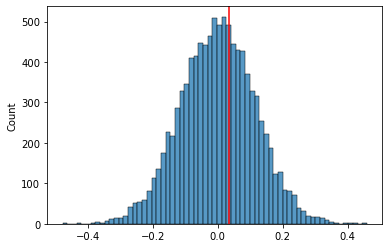

In [110]:
plt = sns.histplot(nullSims)
#plot the cutoff for our experimental value (note that this should be one-sided because 
#the claim/hypothesis was that B cell scores were more highly correlated with the influenza 
#pneomonia group (positive correlation)
plt.axvline(0.03389780364700745, color = "red")

In [111]:
#p-value will be the proportion of simulations with a result as extreme/ more extreme 
#compared to the experimental difference (ie: everything to the right of the red line above 
#because we're looking for a one-sided p-value)
experimental_diff = 0.03389780364700745
countResultsAsOrMoreExtreme = 0
for i in range(0, numSims):
    if (nullSims[i] > experimental_diff):
        countResultsAsOrMoreExtreme += 1;

p_value = countResultsAsOrMoreExtreme/ numSims
print(p_value)

0.385


<div><b> Conclusion regarding the hypothesis that influenza pneumonia patients had a higher score enrichment in B cell signatures compared to bacterial pneumonia patients: </b></div>
<br>
<div>With a p-value of 0.385, the experimental result is nowhere near our threshold of signicance (alpha = 0.05). Simulating the null hypothesis using bootstrapping of our sample-signature score data across all types of B cell signatures resulted in results as extreme or more extreme compared to the experimental result 38.5% of the time simply due to chance. Further research is needed on enrichment of specific B cell signatures in influenza compared to bacterial pneumonia patients, as there seemed to be more interesting underlying data across exact B cell signatures, rather than as a whole. (I'm planning to continue my work with those analyses next... - df )</div>